# 트랜스포머(Transformer)
- 트랜스포머(Transformer)는 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, 논문의 이름처럼 어텐션(Attention)만으로 구현한 모델
- RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 번역 성능에서도 RNN보다 우수한 성능

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

<br>

### 기존 seq2seq 모델의 한계
- 기존의 seq2seq 모델은 인코더-디코더 구조로 구성
  
  여기서 **인코더는 입력 시퀀스를 하나의 벡터 표현으로 압축하고, 디코더는 이 벡터 표현을 통해서 출력 시퀀스를 생성**
- 하지만 이러한 구조는 **인코더가 입력 시퀀스를 하나의 벡터로 압축하는 과정에서 입력 시퀀스의 정보가 일부 손실된다는 단점**

  $→$ **이를 보정하기 위하여 어텐션이 사용**

  $→$ **어텐션을 RNN에 대한 보정이 아닌, 어텐션만으로 인코더와 디코더를 만든다면?**

<br>

### 트랜스포머(Transformer)의 주요 하이퍼파라미터

<br>

#### $d_{model}$
- 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기
- 인베딩 벡터의 차원 또한 $d_{model}$이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 떄에도 이 차원을 유지

<br>


#### $num\_layers$
- 트랜스포머에서 하나의 인코더와 디코더를 층으로 생각하였을 때, 트랜스포머 모델에서 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미

<br>

#### $num\_leads$
- 트랜스포머에서는 어텐션을 사용할 때, 한 번 하는 것 보다 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식

  $→$ 병렬의 개수

<br>

#### $d_{ff}$
- 트랜스포머 내부에는 피드 포워드 신경망이 존재하며 해당 신경망의 은닉층의 크기를 의미
- 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$

<br>

## 트랜스포머(Transformer)

<img src='https://wikidocs.net/images/page/31379/transformer1.PNG'>

- **트랜스포머는 RNN을 사용하지 않지만 기존의 seq2seq처럼 인코더에서 입력 시퀀스를 입력받고, 디코더에서 출력 시퀀스를 출력하는 인코더-디코더 구조를 유지**
- seq2seq 구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점(time step)을 가지는 구조였다면,

  **트랜스포머는 인코더와 디코더라는 단위가 N개로 구성되는 구조**
  
  (트랜스포머를 제안한 논문에서는 인코더와 디코더의 개수를 각각 6개 사용)

<br>

<img src='https://wikidocs.net/images/page/31379/transformer4_final_final_final.PNG'>

- 위의 그림은 인코더로부터 정보를 전달받아 디코더가 출력 결과를 만들어내는 트랜스포머 구조를 보여
- 디코더는 마치 기존의 seq2seq 구조처럼 시작 심볼 <sos>를 입력으로 받아 종료 심볼 <eos>가 나올 때까지 연산을 진행
  
  $\rightarrow$ RNN은 사용되지 않지만 여전히 인코더-디코더의 구조는 유지되고 있음

<br>

## 포지셔널 인코딩(Positional Encoding)
- RNN이 자연어 처리에서 유용했던 이유는 단어의 위치에 따라 **단어를 순차적으로 입력받아서 처리하는 RNN의 특성으로 인해 각 단어의 위치 정보(position information)를 가질 수 있다는 점**
* **하지만 트랜스포머는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치 정보를 다른 방식으로 알려줌**

  $→$ **트랜스포머는 단어의 위치 정보를 얻기 위해서 각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용**

  $→$ **포지셔널 인코딩(positional encoding)**


<img src='https://wikidocs.net/images/page/31379/transformer5_final_final.PNG'>

- 위의 그림에서 입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기 전에, 포지셔널 인코딩의 값이 더해짐
- 임베딩 벡터가 인코더의 입력으로 사용되기 전 포지셔널 인코딩값이 더해지는 과정


<img src='https://wikidocs.net/images/page/31379/transformer6_final.PNG'>

- 트랜스포머는 위치 정보를 가진 값을 만들기 위해서 아래의 두 개의 함수
- 사인 함수와 코사인 함수는 요동치는 값의 형태로, 트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해주므로서 단어의 순서 정보를 더함
  - $pos$ : 입력 문장에서의 임베딩 벡터의 위치
  - $i$ :  임베딩 벡터 내의 차원의 인덱스를 의미
  - $d_{model}$ : 트랜스포머의 모든 층의 출력 차원을 의미하는 트랜스포머의 하이퍼파라미터

$$PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})$$

$$PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})$$

- 위의 임베딩 벡터와 포지셔널 인코딩의 덧셈은,
  
  **임베딩 벡터가 모여 만들어진 문장 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어짐**



<img src='https://wikidocs.net/images/page/31379/transformer7.PNG'>

- **위의 식에 따르면 임베딩 벡터 내의 각 차원의 인덱스가 짝수인 경우에는 사인 함수의 값을 사용하고 홀수인 경우에는 코사인 함수의 값을 사용**

  $→$ $(pos, 2i)$일 때는 사인 함수를 사용하고, $(pos, 2i+1)$일 때는 코사인 함수를 사용


<br>

- 위와 같은 포지셔널 인코딩 방법을 통해 순서 정보를 보존
- 예를 들어 각 임베딩 벡터에 포지셔널 인코딩의 값을 더하면 같은 단어라고 하더라도, 문장 내의 위치에 따라서 트랜스포머의 입력으로 들어가는 임베딩 벡터의 값이 달라짐
  
  $\rightarrow$ 이에 따라 트랜스포머의 입력은 순서 정보가 고려된 임베딩 벡터가 됨

In [2]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

(1, 50, 128)


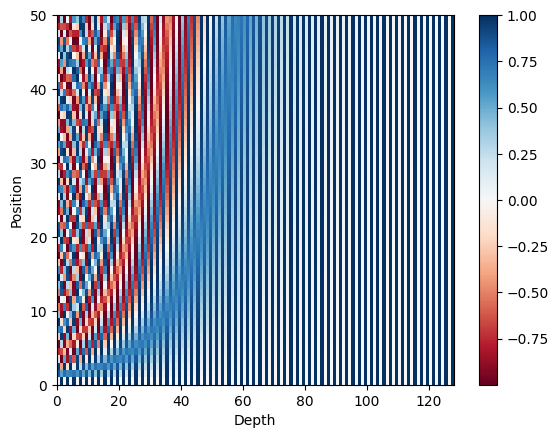

In [3]:
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

<br>

## 어텐션 (Attention)
- 트랜스포머에서는 세 가지의 어텐션이 사용

<img src='https://wikidocs.net/images/page/31379/attention.PNG'>


- 첫번째 그림인 셀프 어텐션은 인코더에서 이루어지지만,
  
  두번째 그림인 셀프 어텐션과 세번째 그림인 인코더-디코더 어텐션은 디코더

<br>

#### **셀프 어텐션 : 셀프 어텐션은 본질적으로 Query, Key, Value가 동일한 경우**
(Query, Key 등이 같다는 것은 벡터의 값이 같다는 것이 아니라 벡터의 출처가 같다는 의미)

#### **인코더-디코더 어텐션 : Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터**

<br>

```
인코더의 셀프 어텐션 : Query = Key = Value
디코더의 마스크드 셀프 어텐션 : Query = Key = Value
디코더의 인코더-디코더 어텐션 : Query : 디코더 벡터 / Key = Value : 인코더 벡터
```

<img src='https://wikidocs.net/images/page/31379/transformer_attention_overview.PNG'>

<br>

### 인코더(Encoder)

<img src='https://wikidocs.net/images/page/31379/transformer9_final_ver.PNG'>



- **트랜스포머는 하이퍼파라미터인 $num\_layers$ 개수의 인코더 층을 쌓음**
  
  (논문에서는 총 6개의 인코더 층을 사용)

- 인코더를 하나의 층이라는 개념으로 생각한다면, 하나의 인코더 층은 크게 '셀프 어텐션'과 '피드 포워드 신경망' 총 2개의 서브층(sublayer) 구성
- **위의 그림에의 '멀티 헤드 셀프 어텐션 (Multi-head Self-Attention)'은 셀프 어텐션을 병렬적으로 사용하였다는 의미,**

  **포지션 와이즈 피드 포워드 신경망은 일반적인 피드 포워드 신경망**

<br>

### 인코더의 셀프 어텐션

<br>

#### 1) 셀프 어텐션의 의미와 이점
- 개념적인 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 계산

  $→$ 구해낸 이 유사도를 가중치로 하여 키와 맵핑되어있는 각각의 '값(Value)'에 반영

  $→$ 유사도가 반영된 '값(Value)'을 모두 가중합하여 리턴

<img src='https://wikidocs.net/images/page/22893/%EC%BF%BC%EB%A6%AC.PNG'>

<br>

- seq2seq에서 어텐션을 사용할 경우의 Q, K, V의 정의
- 어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구함

  → 구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영

  → 유사도가 반영된 '값(Value)'을 모두 더해서 리턴 = 어텐션 값(Attention Value)

```
Q = Query : t 시점의 디코더 셀에서의 은닉 상태
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들
```

- t 시점이라는 것은 계속 변화하면서 반복적으로 쿼리를 수행하므로, 결국 전체 시점에 대해서 일반화를 수행한다면

```
Q = Querys : 모든 시점의 디코더 셀에서의 은닉 상태들
K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
V = Values : 모든 시점의 인코더 셀의 은닉 상태들

```

- 이처럼 기존에는 디코더 셀의 은닉 상태가 Q이고 인코더 셀의 은닉 상태가 K라는 점에서 Q와 K가 서로 다른 값을 가짐
- **하지만, 셀프 어텐션에서는 Q, K, V가 전부 동일**

```
Q : 입력 문장의 모든 단어 벡터들
K : 입력 문장의 모든 단어 벡터들
V : 입력 문장의 모든 단어 벡터들
```

<br>

<img src='https://wikidocs.net/images/page/31379/transformer10.png'>



- 위의 문장을 번역하면

> The animal didn't cross the street because it was too tired
>
> '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.'

- 여기서 그것(it)에 해당하는 것에 대해 사람은 피곤한 주체가 동물이라는 것을 아주 쉽게 알 수 있지만 기계는 그렇지 않음

  $\rightarrow$ 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하므로서 그것(it)이 동물(animal)과 연관되었을 확률이 높다는 것을 탐색

<br>

### 2) Q, K, V 벡터
- 사실 셀프 어텐션은 **인코더의 초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들을 사용하여 셀프 어텐션을 수행하는 것이 아니라,**
  
  **우선 각 단어 벡터들로부터 Q벡터, K벡터, V벡터를 얻는 작업을 거침**
  
  $→$ **이때 이 Q벡터, K벡터, V벡터들은 초기 입력인 $d_{model}$의 차원을 가지는 단어 벡터들보다 더 작은 차원을 가짐**
  
  - 논문에서는 $d_{model}=512$의 차원을 가졌던 각 단어 벡터들을 64의 차원을 가지는 Q벡터, K벡터, V벡터로 변환

- **64라는 값은 트랜스포머의 또 다른 하이퍼파라미터인 $num\_leads$로 인해 결정**

  **트랜스포머는 $d_{model}$을 $num\_leads$로 나눈 값을 각 Q벡터, K벡터, V벡터의 차원으로 결정**
  
  (논문에서는 $num\_leads$를 8)

<br>

*예문 중 student라는 단어 벡터를 Q, K, V의 벡터로 변환하는 과정*


<img src='https://wikidocs.net/images/page/31379/transformer11.PNG'>

- **기존의 벡터로부터 더 작은 벡터는 가중치 행렬을 곱하므로서 완성**
  
  각 가중치 행렬은 $d_{model} × (d_{model}\text{/num_heads})$의 크기를 가지며, 이 가중치 행렬은 훈련 과정에서 학습
  
- 즉, 논문과 같이 $d_{model}=512$이고 $num\_leads=8$라면,

  각 벡터에 3개의 서로 다른 가중치 행렬을 곱하고 64의 크기를 가지는 Q, K, V 벡터를 얻어냄
- 위의 그림은 단어 벡터 중 student 벡터로부터 Q, K, V 벡터를 얻어내는 모습이며,
  
  모든 단어 벡터에 위와 같은 과정을 거치면 I, am, a, student는 각각의 Q, K, V 벡터를 얻음


<br>

### 3) 스케일드 닷-프로덕트 어텐션(Scaled dot-product Attention)
- Q, K, V 벡터를 얻은 이후의 과정은, 기존 어텐션 메커니즘과 동일
  - 각 Q벡터는 모든 K벡터에 대해서 어텐션 스코어를 구하고,
    
    어텐션 분포를 구한 뒤에 이를 사용하여 모든 V벡터를 가중합하고
    
    어텐션 값 또는 컨텍스트 벡터를 계산
    
    그리고 이를 모든 Q벡터에 대해서 반복


- **어텐션 함수의 종류는 다양하며, 트랜스포머에서는 어텐션 챕터에 사용했던 내적만을 사용하는 어텐션 함수 $score(q, k)=q⋅k$가 아닌,**

  **여기에 특값으로 나눠준 어텐션 함수인 $score(q, k)=q⋅k/\sqrt{n}$를 사용**
  
    - **(닷-프로덕트 어텐션(dot-product attention)에서 값을 스케일링하는 것을 추가)**

  $→$ **스케일드 닷-프로덕트 어텐션(Scaled dot-product Attention)**

<br>

<img src='https://wikidocs.net/images/page/31379/transformer13.PNG'>


- 위의 그림은 단어 'I'에 대한 Q벡터가 모든 K벡터에 대해서 어텐션 스코어를 구하는 과정
  - 'am'에 대한 Q벡터, 'a'에 대한 Q벡터, 'student'에 대한 Q벡터에 대해서도 모두 동일한 과정 적용
  - 위의 128과 32는 임의로 가정한 수치로 과정과 무관

- **위의 그림에서 어텐션 스코어는 각각 단어 'I'가 단어 'I', 'am', 'a', 'student'와 얼마나 연관되어 있는지를 보여주는 수치**
- **트랜스포머에서는 두 벡터의 내적값을 스케일링하는 값으로 K벡터의 차원을 나타내는 $d_k$에 루트를 씌운 $\sqrt{d_k}$ 사용하는 것을 선택 (스케일드 닷-프로덕트 어텐션)**
  - $d_k$는 $d_{model}\text{/num_heads}$라는 식에 따라서 64의 값을 가지므로 $\sqrt{d_k}$는 8의 값


<img src='https://wikidocs.net/images/page/31379/transformer14_final.PNG'>



- 어텐션 스코어에 소프트맥스 함수를 사용하여 어텐션 분포(Attention Distribution)을 계산

  $→$ **각 V벡터와 가중합하여 어텐션 값(Attention Value)을 계산**
  
    **(= 단어 'I'에 대한 어텐션 값 또는 단어 'I'에 대한 컨텍스트 벡터(context vector))**
  
  $→$ 'am'에 대한 Q벡터, 'a'에 대 Q벡터, 'student'에 대한 Q벡터에 대해서도 모두 동일한 과정을 반복하여 각각에 대한 어텐션 값 계산




<br>

### 4) 행렬 연산으로 일괄 처리
- **각 단어에 대한 Q, K, V 벡터를 구하고 스케일드 닷-프로덕트 어텐션을 수행하였던 위의 과정들은 벡터 연산이 아니라 행렬 연산을 사용하면 일괄 계산이 가능**
- 각 단어 벡터마다 일일히 가중치 행렬을 곱하는 것이 아니라 문장 행렬에 가중치 행렬을 곱하여 Q행렬, K행렬, V행렬을 계산

<img src='https://wikidocs.net/images/page/31379/transformer12.PNG'>

#### 행렬 연산을 통한 어텐션 스코어 계산
- **Q행렬을 K행렬을 전치한 행렬과 곱함 $→$ 각각의 단어의 Q벡터와 K벡터의 내적이 각 행렬의 원소가 되는 행렬**



<img src='https://wikidocs.net/images/page/31379/transformer15.PNG'>

- **위의 그림의 결과 행렬의 값에 전체적으로  $\sqrt{d_k}$를 나누어주면 이는 각 행과 열이 어텐션 스코어 값을 가지는 행렬 (=어텐션 스코어 행렬)**
  - **예를 들어 'I' 행과 'student' 열의 값은 'I'의 Q벡터와 'student'의 K벡터의 어텐션 스코어 값**
  
  $\rightarrow$ **어텐션 분포를 구하고, 모든 단어에 대한 어텐션 값을 계산**
  
    **어텐션 스코어 행렬에 소프트맥스 함수를 사용하고, V행렬을 곱함**
    
  $\rightarrow$ **각 단어의 어텐션 값을 모두 가지는 어텐션 값 행렬이 계산**



<img src='https://wikidocs.net/images/page/31379/transformer16.PNG'>


* 행렬 연산을 통해 모든 값이 일괄 계산되는 과정

$$Attention(Q, K, V) = softmax({QK^T\over{\sqrt{d_k}}})V$$

#### 행렬 연산에 사용된 행렬의 크기 :
- 입력 문장의 길이를 seq\_len
- 문장 행렬의 크기는 $(\text{seq_len},\ d_{model})$
- 어텐션 스코어 행렬의 각 행에 해당되는 Q벡터와 K벡터의 차원은 $d_k$, V벡터의 차원은 $d_v$
  
  $\rightarrow$ Q행렬과 K행렬의 크기는 $(\text{seq_len},\ d_{k})$이며, V행렬의 크기는 $(\text{seq_len},\ d_{v})$
  
  $\rightarrow$ **문장 행렬과 Q, K, V 행렬의 크기로부터 가중치 행렬의 크기 추정**

  $\rightarrow$ **$W^{Q}$와 $W^{K}$는 $(d_{model},\ d_{k})$의 크기를 가지며, $W^v$는 $(d_{model},\ d_{v})$의 크기**
    
  - 단, 논문에서는 $d_l$와 $d_v$의 차원은 $d_{model}\text{/num_heads}$,
  
    즉 $d_{model}\text{/num_heads}= d_{k}=d_{v}$)

<br>

- **결과적으로 $softmax({QK^T\over{\sqrt{d_k}}})V$ 식을 적용하여 나오는 어텐션 값 행렬 $a$의 크기는 $(\text{seq_len},\ d_{v})$**

<br>

### 5) 스케일드 닷-프로덕트 어텐션 구현

- Q행렬과 K행렬을 전치한 행렬을 곱하고,
  
  소프트맥스 함수를 사용하여 어텐션 분포 행렬을 얻은 뒤에 V행렬과 곱함

- 마스킹 : 입력 문장에 <PAD> 토큰이 있을 경우, 매우 작은 음수값을 넣어 어텐션에서 사실상 제외하기 위한 연산

In [4]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눔
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹 : 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣음
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 됨.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

<br>

#### 테스트
- temp_q, temp_k, temp_v라는 임의의 Query, Key, Value 행렬 생성

In [5]:
np.set_printoptions(suppress=True)

In [6]:
temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1, 0],
                      [  10, 0],
                      [ 100, 5],
                      [1000, 6]], dtype=tf.float32) # (4, 2)

temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32) # (1, 3)

- `temp_q`의 값 [0, 10, 0]은 Key에 해당하는 `temp_k`의 두 번째값 [0, 10, 0]과 일치
  
  $→$ **어텐션 분포는 [0, 1, 0, 0]의 값을 가지며, Value의 두번째 값인 [10, 0]이 출력**

In [7]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)

In [8]:
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


<br>

- 다른 Query 값에 대한 테스트 :
  - Query값 [0, 0, 10]은 Key의 세번째 값과, 네번째 값 두 개의 값 모두와 일치

    → Query의 값은 Key의 세번째 값과 네번째 값과 모두 유사하다는 의미에서, 어텐션 분포는 [0, 0, 0.5, 0.5]의 값을 가짐

    → 나오는 값 [550, 5.5]는 Value의 세번째 값 [100, 5]에 0.5를 곱한 값과 네번째 값 [1000, 6]에 0.5를 곱한 값의 원소별 합

In [9]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)

In [10]:
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


<br>

- 하나가 아닌 3개의 Query의 값을 입력

In [11]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)

In [12]:
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


<br>

### 6) 멀티 헤드 어텐션(Multi-head Attention)

<img src='https://wikidocs.net/images/page/31379/transformer17.PNG'>


- 트랜스포머 연구진은 한 번의 어텐션을 하는 것보다 여러번의 어텐션을 병렬로 사용하는 것이 더 효과적이라고 판단
  
  $\rightarrow$ $d_{model}$의 차원을 $num\_leads$개로 나누어 $d_{model}\text{/num_heads}$의 차원을 가지는 Q, K, V에 대해서 $num\_leads$개의 병렬 어텐션을 수행

  (논문에서는 하이퍼파라미터인 $num\_heads$의 값을 8로 지정하였고, 8개의 병렬 어텐션이 진행)
  
  $→$ **다시 말해 위에서 설명한 어텐션이 8개로 병렬로 이루어지며, 이때 각각의 어텐션 값 행렬은 어텐션 헤드**

  - **이때, $W^{Q}, W^{K}, W^{V}$의 값은 8개의 어텐션 헤드마다 전부 다름**

<br>

#### 병렬 어텐션의 이점
- 그리스로마신화의 머리가 여러 개인 괴물 히드라나 케로베로스는 머리가 여러 개이기 때문에 여러 시점에서 상대방을 볼 수 있음
  
  $\rightarrow$ **시각에서 놓치는 게 별로 없음**
  
  $→$ **어텐션을 병렬로 수행하여 다른 시각으로 정보들을 수집**

- 예를 들어,

> '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.'

- 위의 예문에서 단어 그것(it)이 쿼리였다면, 'it'에 대한 Q벡터로부터 다른 단어와의 연관도를 구하였을 때, 첫번째 어텐션 헤드는 '그것(it)'과 '동물(animal)'의 연관도를 높게 본다면,

  두번째 어텐션 헤드는 '그것(it)'과 '피곤하였기 때문이다(tired)'의 연관도를 높게 볼 수 있음

  $\rightarrow$ **각 어텐션 헤드는 전부 다른 시각에서 볼 수 있기 때문**


<br>

<img src='https://wikidocs.net/images/page/31379/transformer18_final.PNG'>

- **병렬 어텐션을 모두 수행하였다면 모든 어텐션 헤드를 연결(concatenate)**
  - 모두 연결된 어텐션 헤드 행렬의 크기는 $(\text{seq_len},\ d_{model})$

<br>

<img src='https://wikidocs.net/images/page/31379/transformer19.PNG'>

-  위의 그림은 어텐션 헤드를 모두 연결한 행렬이 가중치 행렬 $W^o$과 곱해지는 과정
  
  **어텐션 헤드를 모두 연결한 행렬은 또 다른 가중치 행렬 $W^{o}$를 곱함 $→$ 멀티-헤드 어텐션의 결과**

  $→$ **이때 결과물인 멀티-헤드 어텐션 행렬은 인코더의 입력이었던 문장 행렬의 $(\text{seq_len},\ d_{model})$ 크기와 동일**

  $→$ **인코더의 첫번째 서브층인 멀티-헤드 어텐션 단계를 끝마쳤을 때, 인코더의 입력으로 들어왔던 행렬의 크기가 아직 유지되고 있음**

    **첫번째 서브층인 멀티-헤드 어텐션과 두번째 서브층인 포지션 와이즈 피드 포워드 신경망을 지나면서 인코더의 입력으로 들어올 때의 행렬의 크기는 계속 유지되어야 함**
  
- **트랜스포머는 동일한 구조의 인코더를 쌓은 구조이기에 (논문 기준으로는 인코더가 총 6개) 인코더에서의 입력의 크기가 출력에서도 동일 크기로 계속 유지되어야만 다음 인코더에서도 다시 입력이 될 수 있음**



<br>

### 7) 멀티 헤드 어텐션(Multi-head Attention) 구현
- **멀티 헤드 어텐션에서는 크게 두 종류의 가중치 행렬이 존재**
1. Q, K, V 행렬을 만들기 위한 가중치 행렬인 $W^Q$, $W^K$, $W^V$ 행렬
2. 어텐션 헤드들을 연결(concatenation) 후에 곱해주는 $W^O$ 행렬

- 가중치 행렬을 곱하는 것을 구현 상에서는 입력을 전결합층. **즉, 밀집층(Dense layer)을 지나게 하여 구현**


<br>

- **멀티 헤드 어텐션의 구현은 크게 다섯 가지 파트로 구성**
1. $W^Q$, $W^K$, $W^V$에 해당하는 $d\_model$ 크기의 밀집층(Dense layer)을 지남
2. 지정된 헤드 수(num_heads)만큼 나눔(split).
3. 스케일드 닷 프로덕트 어텐션.
4. 나눠졌던 헤드들을 연결(concatenatetion)
5. $W^O$에 해당하는 밀집층을 지남

In [13]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있음.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

<br>

### 8) 패딩 마스크 (Padding Mask)
- 이는 입력 문장에 \<PAD\> 토큰이 있을 경우 어텐션에서 사실상 제외하기 위한 연산
-  \<PAD\>가 포함된 입력 문장의 셀프 어텐션의 경우에서, 어텐션을 수행하고 어텐션 스코어 행렬을 얻는 과정

<img src='https://wikidocs.net/images/page/31379/pad_masking11.PNG'>



- 단어 \<PAD\>의 경우에는 실질적인 의미를 가진 단어가 아님
  
  $\rightarrow$ **트랜스포머에서는 Key의 경우에 <PAD> 토큰이 존재한다면 이에 대해서는 유사도를 구하지 않도록 마스킹(Masking)**
  
  (마스킹이란 어텐션에서 제외하기 위해 값을 가린다는 의미)
  
- **어텐션 스코어 행렬에서 행에 해당하는 문장은 Query이고, 열에 해당하는 문장은 Key일 때, Key에 \<PAD\>가 있는 경우에는 해당 열 전체를 마스킹**

<img src='https://wikidocs.net/images/page/31379/pad_masking2.PNG'>

- **마스킹을 하는 방법은 어텐션 스코어 행렬의 마스킹 위치에 매우 작은 음수값을 넣어주는 것**
  
  - 매우 작은 음수값이라는 것은 -1,000,000,000과 같은 -무한대에 가까운 수라는 의미

- **소프트맥스 함수를 지나지 않은 현재 어텐션 스코어는 소프트맥스 함수를 지나고, 그 후 Value 행렬과 곱해지게 됨**

  **그런데 현재 마스킹 위치에 매우 작은 음수 값이 들어가 있다면, 어텐션 스코어 행렬이 소프트맥스 함수를 지난 후에는 해당 위치의 값은 0이 되어 단어 간 유사도를 구하는 일에 \<PAD\> 토큰이 반영되지 않음**

<img src='https://wikidocs.net/images/page/31379/softmax.PNG'>

- 위 그림은 소프트맥스 함수를 지난 후를 가정
- **소프트맥스 함수를 지나면 각 행의 어텐션 가중치의 총 합은 1이 되는데,**

  **단어 \<PAD\>의 경우에는 0이 되어 어떤 유의미한 값을 가지고 있지 않음**

<br>

#### 패딩 마스크 구현

- 패딩 마스크를 구현하는 방법은 입력된 정수 시퀀스에서 패딩 토큰의 인덱스인지, 아닌지를 판별하는 함수를 구현하는 것

- 정수 시퀀스에서, 0인 경우에는 1로 변환하고, 그렇지 않은 경우에는 0으로 변환하는 함수


In [14]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [15]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


- 위 벡터를 통해서 1의 값을 가진 위치의 열을 어텐션 스코어 행렬에서 마스킹하는 용도로 사용
- 위 벡터를 스케일드 닷 프로덕트 어텐션의 인자로 전달하면,

  스케일드 닷 프로덕트 어텐션에서는 위 벡터에다가 매우 작은 음수값인 -1e9를 곱하고,
  
  이를 행렬에 더해주어 해당 열을 전부 마스킹



<br>

## 포지션-와이즈 피드 포워드 신경망(Position-wise FFNN)
- **포지션 와이즈 FFNN은 인코더와 디코더에서 공통적으로 가지고 있는 서브층**
  - **포지션-와이즈 FFNN는 쉽게 말하면 완전 연결 FFNN(Fully-connected FFNN)이라고 해석**
- 인공 신경망은 결국 벡터와 행렬 연산으로 표현될 수 있음며, 아래는 포지션 와이즈 FFNN의 수식

$$FFNN(x) = MAX(0,\;x{W_{1}} + b_{1}){W_2} + b_2$$

<img src='https://wikidocs.net/images/page/31379/positionwiseffnn.PNG'>

- **여기서 $x$는 멀티 헤드 어텐션의 결과로 나온 $(\text{seq_len},\ d_{model})$의 크기를 가지는 행렬**
- 가중치 행렬 $W_{1}$은 $(d_{model},\ d_{ff})$의 크기를 가지고, 가중치 행렬 $W_{2}$은 $(d_{ff},\ d_{model})$의 크기를 가짐

  (논문에서 은닉층의 크기인 하이퍼파라미터 $d_{ff}$는 2,048의 크기)

- **여기서 매개변수 $W_{1}$, $b_{1}$, $W_{2}$, $b_{2}$는 하나의 인코더 층 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하게 사용되지만,**
  
  **인코더 층마다는 다른 값을 가짐**

<img src='https://wikidocs.net/images/page/31379/transformer20.PNG'>

- 위의 그림에서 좌측은 인코더의 입력을 벡터 단위로 봤을 때, 각 벡터들이 멀티 헤드 어텐션 층이라는 인코더 내 첫번째 서브 층을 지나 두번째 서브층인 Position-wise FFNN을 통과하는 과정을 보여줌
- 실제로는 그림의 우측과 같이 행렬로 연산되는데,

  두번째 서브층을 지난 인코더의 최종 출력은 여전히 인코더의 입력의 크기였던 $(\text{seq_len},\ d_{model})$의 크기가 보존
  
- 하나의 인코더 층을 지난 이 행렬은 다음 인코더 층으로 전달되고, 다음 층에서도 동일한 인코더 연산이 반복

- 이를 구현하면 아래와 같음

```python
outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
outputs = tf.keras.layers.Dense(units=d_model)(outputs)
```

<br>

##  잔차 연결(Residual connection)과 층 정규화(Layer Normalization)

<br>

<img src='https://wikidocs.net/images/page/31379/transformer21.PNG'>

- 트랜스포머에서는 멀티-헤드 셀프 어텐션과 Position-wise FFNN 두 개의 서브층을 가진 인코더에 추가적으로 사용하는 기법이 존재

  $\rightarrow$ **Add & Norm (잔차 연결(residual connection)과 층 정규화(layer normalization))**

- 위의 그림은 Position-wise FFNN를 설명할 때 사용한 앞선 그림에서 화살표와 Add & Norm(잔차 연결과 정규화 과정)을 추가한 형태
- 추가된 화살표들은 서브층 이전의 입력에서 시작되어 서브층의 출력 부분을 향하고 있음



<br>

### 1) 잔차 연결 (Residual connection, [관련 논문](https://arxiv.org/pdf/1512.03385.pdf))

<img src='https://wikidocs.net/images/page/31379/transformer22.PNG'>

- 위 그림은 입력 $x$와, $x$에 대한 어떤 함수 $F(x)$의 값을 더한 함수 $H(x)$의 구조
  
- **$F(x)$가 트랜스포머의 서브층에 해당할 때, 잔차 연결은 서브층의 입력과 출력을 더하는 것**
  
  **트랜스포머에서 서브층의 입력과 출력은 동일한 차원을 갖고 있으므로, 서브층의 입력과 서브층의 출력은 덧셈 연산이 가능**
  
  (이것이 바로 위의 인코더 그림에서 각 화살표가 서브층의 입력에서 출력으로 향하도록 그려졌던 이유)
- 잔차 연결은 컴퓨터 비전 분야에서 주로 사용되는 모델의 학습을 돕는 기법

- **이를 식으로 표현하면 $x+Sublayer(x)$이며, 가령, 서브층이 멀티 헤드 어텐션이었다면 잔차 연결 연산은**

$$H(x) = x+Multi-head\ Attention(x)$$

<img src='https://wikidocs.net/images/page/31379/residual_connection.PNG'>

<br>

### 2) 층 정규화 (Layer Normalization) ([관련 논문](https://arxiv.org/pdf/1607.06450.pdf))

- **잔차 연결을 거친 결과는 이어서 층 정규화 과정을 거침**
- 잔차 연결의 입력을 $x$, 잔차 연결과 층 정규화 두 가지 연산을 모두 수행한 후의 결과 행렬을 $LN$이라고 하였을 때,
  
  잔차 연결 후 층 정규화 연산을 수식으로 표현

$$LN = LayerNorm(x+Sublayer(x))$$

<br>

- **층 정규화는 텐서의 마지막 차원에 대해서 평균과 분산을 구하고, 이를 가지고 어떤 수식을 통해 값을 정규화하여 학습을 도움**
  - 여기서 텐서의 마지막 차원이란 것은 트랜스포머에서는 $d_{model}$ 차원을 의미
- 아래 그림은 $d_{model}$ 차원의 방향을 화살표로 표현

<img src='https://wikidocs.net/images/page/31379/layer_norm_new_1_final.PNG'>

<br>

#### 층 정규화의 과정

- 층 정규화를 위해서 우선, 화살표 방향으로 각각 평균 $\mu$와 분산 $\sigma^2$을 계산

  (각 화살표 방향의 벡터를 $x_i$라고 명명)

<img src='https://wikidocs.net/images/page/31379/layer_norm_new_2_final.PNG'>

- 층 정규화를 수행한 후에는 벡터 $x_i$는 $ln_i$라는 벡터로 정규화

$$ln_{i} = LayerNorm(x_{i})$$

- 평균과 분산을 통해 벡터 $x_{i}$를 정규화
  - $x_{i}$는 벡터인 반면, 평균 $μ_{i}$과 분산 $σ^{2}_{i}$은 스칼라
  - 벡터 $x_{i}$의 각 차원을 $k$라고 하였을 때, $x_{i,k}$는 다음의 수식과 같이 정규화
  - $ϵ$(입실론)은 분모가 0이 되는 것을 방지하는 값
    
    다시 말해 벡터 $x_{i}$의 각 $k$차원의 값이 다음과 같이 정규화 되는 것

$$\hat{x}_{i, k} = \frac{x_{i, k}-μ_{i}}{\sqrt{σ^{2}_{i}+\epsilon}}$$

- **$γ$(감마)와 $β$(베타)라는 벡터를 준비. 단, 이들의 초기값은 각각 1과 0**

<img src='https://wikidocs.net/images/page/31379/%EA%B0%90%EB%A7%88%EB%B2%A0%ED%83%80.PNG'>

- $γ$와 $β$를 도입한 층 정규화의 최종 수식은 다음과 같으며

  $γ$와 $β$는 학습 가능한 파라미터

$$ln_{i} = γ\hat{x}_{i}+β = LayerNorm(x_{i})$$

<br>

- 케라스에서는 층 정규화를 위한 `LayerNormalization()`를 제공. 이를 사용

<br>

## 인코더 구현
- 인코더의 입력으로 들어가는 문장에는 패딩이 있을 수 있으므로, 어텐션 시 패딩 토큰을 제외하도록 패딩 마스크를 사용
- 인코더는 총 두 개의 서브층으로 이루어지는데, 멀티 헤드 어텐션과 피드 포워드 신경망
- 각 서브층 이후에는 드롭 아웃, 잔차 연결과 층 정규화가 수행

<br>

- 아래 코드는 하나의 인코더 블록. 즉, 하나의 인코더 층을 구현하는 코드
- **실제로 트랜스포머는 num_layers 개수만큼의 인코더 층을 사용하므로 이를 여러번 쌓는 코드를 별도 구현**

In [16]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

<br>

## 인코더 쌓기
- **인코더 층을 num_layers개만큼 쌓고, 마지막 인코더 층에서 얻는 (seq_len, d_model) 크기의 행렬을 디코더로 보내주므로서 트랜스포머 인코더의 인코딩 연산을 완료**
- 아래의 코드는 인코더 층을 num_layers개만큼 쌓는 코드

In [17]:
def encoder(vocab_size, num_layers, dff, d_model, num_heads, dropout, name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

<br>

## 인코더에서 디코더로(From Encoder To Decoder)

- 구현된 인코더는 총 $num\_layers$만큼의 층 연산을 순차적으로 한 후에 마지막 층의 인코더의 출력을 디코더에게 전달
- 인코더 연산이 끝났으면 디코더 연산이 시작되어 디코더 또한 $num\_layers$
만큼의 연산을 하는데,
  
  이때마다 인코더가 보낸 출력을 각 디코더 층 연산에 사용
  
<img src='https://wikidocs.net/images/page/31379/transformer_from_encoder_to_decoder.PNG'>

<br>

##  디코더의 첫번째 서브층 : 셀프 어텐션과 룩-어헤드 마스크

<img src='https://wikidocs.net/images/page/31379/decoder.PNG'>

- **위 그림과 같이 디코더도 인코더와 동일하게, 임베딩 층과 포지셔널 인코딩을 거친 후의 문장 행렬이 입력**
- **트랜스포머 또한 seq2seq와 마찬가지로 교사 강요(Teacher Forcing)을 사용하여 훈련되므로,**
  
  **학습 과정에서 디코더는 번역할 문장에 해당되는 '\<sos\> je suis étudiant'의 문장 행렬을 한 번에 입력받음**
  
  **그리고 디코더는 이 문장 행렬로부터 각 시점의 단어를 예측하도록 훈련**

- 여기서 seq2seq의 디코더에 사용되는 RNN 계열의 신경망은 입력 단어를 매 시점마다 순차적으로 입력받으므로,

  다음 단어 예측에 현재 시점을 포함한 이전 시점에 입력된 단어들만 참고할 수 있음
  
  **반면, 트랜스포머는 문장 행렬로 입력을 한 번에 받으므로 현재 시점의 단어를 예측하고자 할 때,**
  
  **입력 문장 행렬로부터 미래 시점의 단어까지도 참고할 수 있는 현상이 발생**
  
  - 가령, suis를 예측해야 하는 시점에서
    
    RNN 계열의 seq2seq의 디코더라면 현재까지 디코더에 입력된 단어는 \<sos\>와 'je'뿐이지만
    
    **트랜스포머는 이미 문장 행렬로 '\<sos\> je suis étudiant'를 입력받음**

  $→$ **이를 위해 트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 룩-어헤드 마스크(look-ahead mask)를 도입. ('미리보기에 대한 마스크')**

<br>

#### 룩-어헤드 마스크 (Look-ahead Mask)

<img src='https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94.PNG'>

- **룩-어헤드 마스크(look-ahead mask)는 디코더의 첫번째 서브층에서 이루어짐**
- 디코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층은 인코더의 첫번째 서브층인 멀티 헤드 셀프 어텐션 층과 동일한 연산을 수행

  **오직 다른 점은 어텐션 스코어 행렬에서 마스킹을 적용한다는 점**
- 다음과 같이 셀프 어텐션을 통해 어텐션 스코어 행렬을 계산

<img src='https://wikidocs.net/images/page/31379/decoder_attention_score_matrix.PNG'>

- 이제 자기 자신보다 미래에 있는 단어들은 참고하지 못하도록 다음과 같이 마스킹

<img src='https://wikidocs.net/images/page/31379/%EB%A3%A9%EC%96%B4%ED%97%A4%EB%93%9C%EB%A7%88%EC%8A%A4%ED%81%AC.PNG'>

- **마스킹 된 후의 어텐션 스코어 행렬의 각 행을 보면, 자기 자신과 그 이전 단어들만을 참고할 수 있음**
- 그 외에는 근본적으로 셀프 어텐션이라는 점과, 멀티 헤드 어텐션을 수행한다는 점에서 인코더의 첫번째 서브층과 동일

<br>

#### 룩-어헤드 마스크의 구현
- 트랜스포머에는 총 세 가지 어텐션이 존재하며, 모두 멀티 헤드 어텐션을 수행하고, 멀티 헤드 어텐션 함수 내부에서 스케일드 닷 프로덕트 어텐션 함수를 호출

- **각 어텐션 시 함수에 전달하는 마스킹**
1. 인코더의 셀프 어텐션 : 패딩 마스크를 전달
2. 디코더의 첫번째 서브층인 마스크드 셀프 어텐션 : 룩-어헤드 마스크를 전달
3. 디코더의 두번째 서브층인 인코더-디코더 어텐션 : 패딩 마스크를 전달

<br>

- **룩-어헤드 마스크를 한다고해서 패딩 마스크가 불필요한 것이 아니므로 룩-어헤드 마스크는 패딩 마스크를 포함하도록 구현**
-  룩-어헤드 마스크를 구현하는 방법은 패딩 마스크 때와 마찬가지로 마스킹을 하고자 하는 위치에는 1을, 마스킹을 하지 않는 위치에는 0을 리턴

<br>

*디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수*

In [18]:
# 패딩 마스크 함수

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [19]:
print(create_padding_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor([[[[0. 0. 1. 0. 0.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [20]:
# 룩-어헤드 마스크 함수

def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

- 룩-어헤드 마스크로 삼각형 모양의 마스킹이 형성되면서, 패딩 마스크가 포함되어져 있는 세번째 열이 마스킹

In [21]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


<br>

## 디코더의 두번째 서브층 : 인코더-디코더 어텐션
- **디코더의 두번째 서브층은 멀티 헤드 어텐션을 수행한다는 점에서는 이전의 어텐션들(인코더와 디코더의 첫번째 서브층)과는 공통점이 있으나, 셀프 어텐션이 아님**

  - 셀프 어텐션은 Query, Key, Value가 같은 경우를 말하는데,

    **인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key와 Value는 인코더 행렬**
  

```
인코더의 첫번째 서브층 : Query = Key = Value
디코더의 첫번째 서브층 : Query = Key = Value
디코더의 두번째 서브층 : Query : 디코더 행렬 / Key = Value : 인코더 행렬
```



<br>

- 디코더의 두번째 서브층에는 다음과 같이 인코더로부터 두 개의 화살표가 존재

<img src='https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5.PNG'>

- **두 개의 화살표는 각각 Key와 Value를 의미하며, 이는 인코더의 마지막 층에서 온 행렬로부터 얻음**
  
  **반면 Query는 디코더의 첫번째 서브층의 결과 행렬로부터 얻음**
- Query가 디코더 행렬, Key가 인코더 행렬일 때, 어텐션 스코어 행렬을 구하는 과정은

<img src='https://wikidocs.net/images/page/31379/%EB%94%94%EC%BD%94%EB%8D%94%EB%91%90%EB%B2%88%EC%A7%B8%EC%84%9C%EB%B8%8C%EC%B8%B5%EC%9D%98%EC%96%B4%ED%85%90%EC%85%98%EC%8A%A4%EC%BD%94%EC%96%B4%ED%96%89%EB%A0%AC_final.PNG'>

- 그 외에 멀티 헤드 어텐션을 수행하는 과정은 다른 어텐션들과 동일

<br>

## 디코더 구현
* 디코더는 총 세 개의 서브층으로 구성
- 첫번째와 두번째 서브층 모두 멀티 헤드 어텐션이지만,

  첫번째 서브층은 mask의 인자값으로 `look_ahead_mask` (룩-어헤드 마스크)가 들어가는 반면,
  
  두번째 서브층은 mask의 인자값으로 `padding_mask` (패딩 마스크)가 적용
  
  $\rightarrow$ 첫번째 서브층은 마스크드 셀프 어텐션을 수행
  
- 세 개의 서브층 모두 서브층 연산 후에는 드롭 아웃, 잔차 연결, 층 정규화가 수행


In [22]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩-어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

<br>

## 디코더 쌓기
- 포지셔널 인코딩 후, 디코더 층을 $num\_layers$의 개수만큼 쌓음

In [23]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

<br>

## 트랜스포머 구현
- 지금까지 구현한 인코더와 디코더 함수를 조합하여 트랜스포머를 조립
- 인코더의 출력은 디코더에서 인코더-디코더 어텐션에서 사용되기 위해 디코더로 전달
- 디코더의 끝단에는 다중 클래스 분류 문제를 풀 수 있도록, `vocab_size` 만큼의 뉴런을 가지는 출력층을 추가


In [24]:
def transformer(vocab_size, num_layers, dff, d_model, num_heads, dropout, name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

<br>

## 트랜스포머 하이퍼파라미터 튜닝
- 트랜스포머의 하이퍼파라미터를 임의로 선정
- 단어 집합의 크기는 임의로 9,000으로 결정
  
  $\rightarrow$ **단어 집합의 크기로부터 룩업 테이블을 수행할 임베딩 테이블과 포지셔널 인코딩 행렬의 행의 크기를 결정할 수 있음**

- 인코더와 디코더 층의 개수 $num\_layers$ : 4
- 인코더와 디코더의 포지션 와이즈 피드 포워드 신경망의 은닉층 $d_{ff}$ : 128
- 인코더와 디코더의 입,출력 차원 $d_{model}$ : 128
- 멀티-헤드 어텐션에서의 병렬적으로 사용할 헤드의 수 $num\_heads$ : 4
- $d_v$ : 128/4= 32

(1, 9000, 128)
(1, 9000, 128)


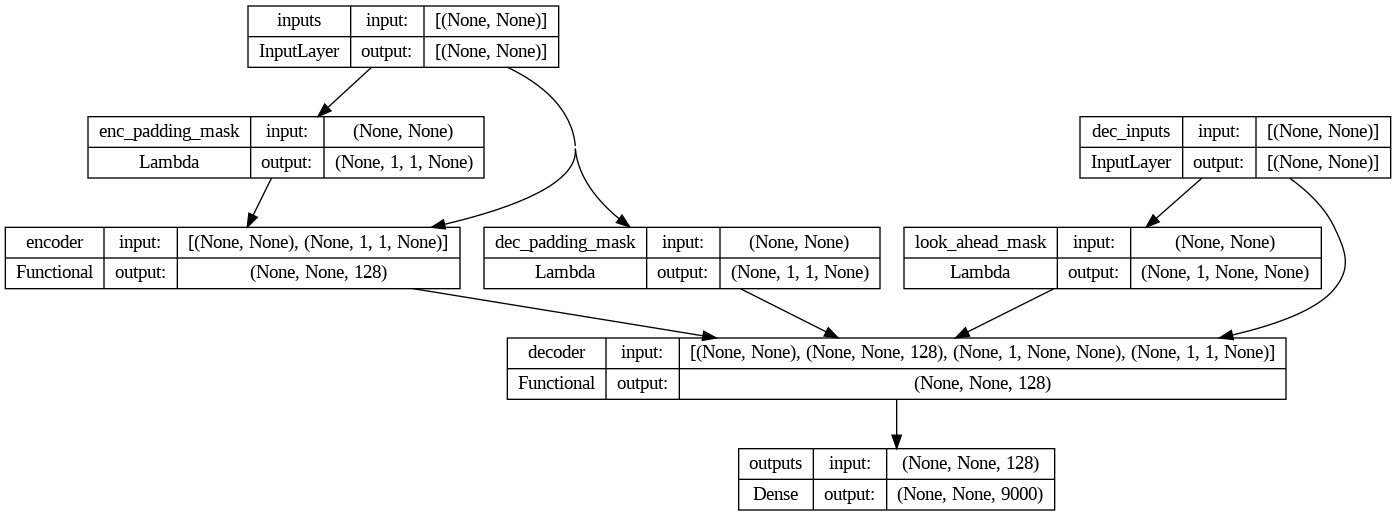

In [25]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(small_transformer, to_file='small_transformer.png', show_shapes=True)

<br>

## 손실 함수 정의
- 다중 클래스 분류 문제이므로 크로스 엔트로피 함수를 손실 함수로 정의

In [26]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

<br>

## 학습률
* **학습률 스케줄러(Learning rate Scheduler)는 미리 학습 일정을 정해두고 그 일정에 따라 학습률이 조정되는 방법**
- **트랜스포머의 경우 사용자가 정한 단계까지는 학습률을 증가시켰다가 단계에 이르면 학습률을 점차적으로 떨어트리는 방식을 사용**

<br>

- `step_num`(단계) : 옵티마이저가 매개변수를 업데이트 하는 한 번의 진행 횟수를 의미
- 트랜스포머에서는 `warmup_steps`이라는 변수를 정하고 `step_num`이 `warmup_steps`보다 작을 경우는 학습률을 선형적으로 증가 시키고,

  `step_num`이 `warmup_steps`에 도달하게 되면 학습률을 `step_num`의 역제곱근에 따라서 감소
  
$$\Large{lrate = d_{model}^{-0.5} × min(\text{step_num}^{-0.5},\ \text{step_num} × \text{warmup_steps}^{-1.5})}$$



In [27]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

<br>

- 학습률의 변화

Text(0.5, 0, 'Train Step')

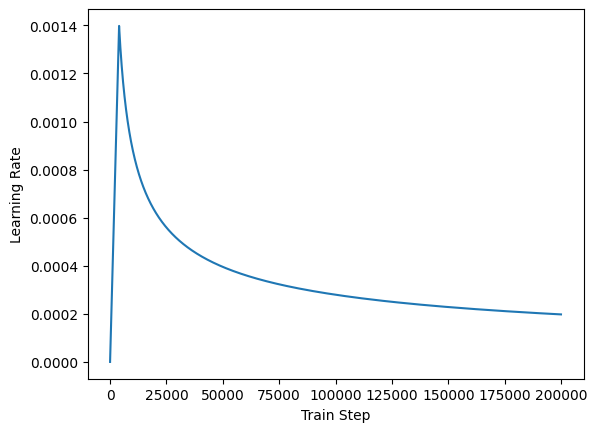

In [28]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

<br>

<hr>

<br>

# 챗봇 구현

In [29]:
import pandas as pd
import urllib.request
import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import re

- 질문(Q)과 대답(A)의 쌍으로 이루어진 데이터

In [30]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename="ChatBotData.csv")

train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [31]:
print('챗봇 샘플의 개수 :', len(train_data))

챗봇 샘플의 개수 : 11823


In [32]:
print(train_data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


<br>

- 토큰화를 위해 형태소 분석기를 사용하지 않고, 다른 방법인 학습 기반의 토크나이저를 사용
  - 원 데이터에서 ?, ., !와 같은 구두점을 미리 처리 $\rightarrow$ 구두점 앞에 띄어쓰기를 추가하여 다른 문자들과 구분

  $→$ 질문 데이터와 답변 데이터 모두에 적용

In [33]:
questions = []

for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [34]:
answers = []

for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [35]:
print(questions[:5])
print(answers[:5])

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


<br>

## 단어 집합 생성
- 서브워드텍스트인코더를 사용
- 자주 사용되는 서브워드 단위로 토큰을 분리하는 토크나이저로 학습 데이터로부터 학습하여 서브워드로 구성된 단어 집합을 생성


<br>

- 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성

In [36]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

- 시작 토큰과 종료 토큰에 대한 정수 부여

In [37]:
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

- 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2

In [38]:
VOCAB_SIZE = tokenizer.vocab_size + 2

In [39]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8178]
종료 토큰 번호 : [8179]
단어 집합의 크기 : 8180


<br>

## 정수 인코딩과 패딩
- 단어 집합을 생성한 후에는 서브워드텍스트인코더의 토크나이저로 정수 인코딩을 진행
  - 토크나이저의 .encode() 메소드를 사용
  
- 임의의 20번 질문 샘플에 정수 인코딩


In [40]:
print(questions[20])

가스비 비싼데 감기 걸리겠어


In [41]:
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [5766, 611, 3509, 141, 685, 3747, 849]


- `.decode()` 메소드를 사용하여, 기존의 텍스트 시퀀스로 복원

In [42]:
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

In [43]:
# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

정수 인코딩 후의 문장 [5766, 611, 3509, 141, 685, 3747, 849]


In [44]:
# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

기존 문장: 가스비 비싼데 감기 걸리겠어


- 정수 인코딩 된 문장을 `.decode()`을 하면 자동으로 서브워드들까지 다시 붙여서 기존 단어로 복원
  - 정수 인코딩 문장을 보면 정수가 7개인데 기존 문장의 띄어쓰기 단위인 어절은 4개밖에 존재하지 않음
    
    이는 '가스비'나 '비싼데'라는 한 어절이 정수 인코딩 후에는 두 개 이상의 정수일 수 있다는 것

- 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력


In [45]:
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징
# 띄어쓰기 단위 X, 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
685 ----> 감기 
3747 ----> 걸리
849 ----> 겠어


- 전체 데이터에 대해서 정수 인코딩과 패딩을 진행
  - 임의로 패딩의 길이는 40으로 지정


In [46]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

- 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩


In [47]:
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [48]:
questions, answers = tokenize_and_filter(questions, answers)

In [49]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (11823, 40)
답변 데이터의 크기(shape) : (11823, 40)


In [50]:
print(questions[0])
print(answers[0])

[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [51]:
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

단어 집합의 크기(Vocab size): 8180
전체 샘플의 수(Number of samples): 11823


<br>

## 인코더와 디코더의 입력, 레이블 생성

- **`tf.data.Dataset`을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶음**
- **또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성**
  - **디코더의 실제값 시퀀스에서는 시작 토큰을 제거**

In [52]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

In [53]:
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 마지막 패딩 토큰이 제거.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거 (시작 토큰이 제거)
    },
))

In [54]:
dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

- 기존 샘플

In [55]:
print(answers[0])

[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


- 마지막 패딩 토큰을 제거하면서 길이가 39

In [56]:
print(answers[:1][:, :-1])

[[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


- 시작 토큰이 제거되며, 길이는 39

In [57]:
print(answers[:1][:, 1:])

[[3844   74 7894    1 8179    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


<br>

## 트랜스포머 생성

$d_{model}=256$

$\text{num_layers}=2$

$\text{num_heads}=8$

$d_{ff}=512$

In [58]:
tf.keras.backend.clear_session()

In [59]:
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1
MAX_LENGTH = 40

In [60]:
model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 8180, 256)
(1, 8180, 256)


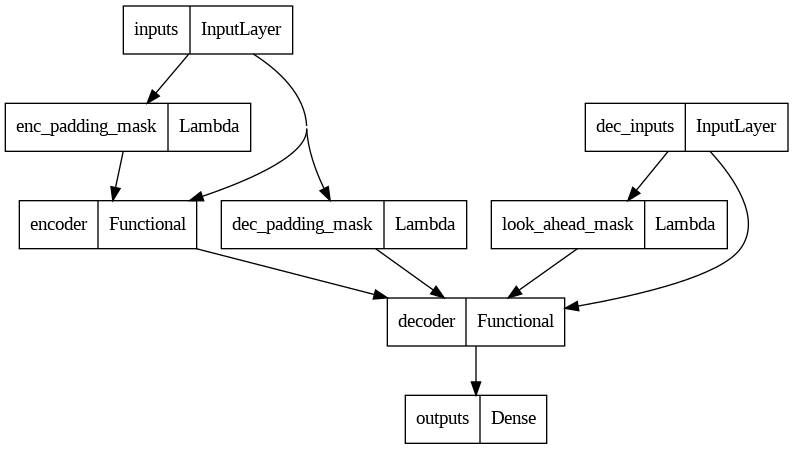

In [61]:
plot_model(model)

<br>

- 학습률과 옵티마이저를 정의하고 모델을 컴파일

In [62]:
learning_rate = CustomSchedule(D_MODEL)

In [63]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [64]:
def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

In [65]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

<br>

- 50회 모델 학습

In [66]:
EPOCHS = 50

model.fit(dataset, epochs=EPOCHS, verbose=True)

Epoch 1/50
185/185 [==============================] - 50s 116ms/step - loss: 1.4587 - accuracy: 0.0196
Epoch 2/50
185/185 [==============================] - 12s 66ms/step - loss: 1.1881 - accuracy: 0.0476
Epoch 3/50
185/185 [==============================] - 12s 67ms/step - loss: 1.0101 - accuracy: 0.0507
Epoch 4/50
185/185 [==============================] - 12s 62ms/step - loss: 0.9287 - accuracy: 0.0544
Epoch 5/50
185/185 [==============================] - 11s 61ms/step - loss: 0.8682 - accuracy: 0.0579
Epoch 6/50
185/185 [==============================] - 11s 61ms/step - loss: 0.8069 - accuracy: 0.0624
Epoch 7/50
185/185 [==============================] - 11s 60ms/step - loss: 0.7405 - accuracy: 0.0684
Epoch 8/50
185/185 [==============================] - 11s 62ms/step - loss: 0.6675 - accuracy: 0.0764
Epoch 9/50
185/185 [==============================] - 12s 66ms/step - loss: 0.5893 - accuracy: 0.0850
Epoch 10/50
185/185 [==============================] - 11s 60ms/step - loss: 0.50

<br>

## 챗봇 평가
- 챗봇을 평가하기 위한 세 개의 함수를 구현
- 예측 함수에서 평가 함수를 호출하고 평가 함수에서 문장 전처리 함수를 호출하는 구조
- 사용자의 입력이 파이썬의 문자열로 입력되면 문장 전처리 함수에서 문자열에 대한 전처리를 수행

<br>

- 해당 전처리는 학습 전 질문 데이터와 답변 데이터에서 했던 전처리와 동일한 전처리

In [67]:
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

- 전처리가 진행된 문자열에 대해서 평가 함수는 트랜스포머 모델에 전처리가 진행된 사용자의 입력을 전달하고,
  
  디코더를 통해 계속해서 현재 시점의 예측. **다시 말해 챗봇의 대답에 해당하는 단어를 순차적으로 예측**
- 여기서 예측된 단어들은 문자열이 아니라 정수인 상태이므로 평가 함수가 리턴하는 것은 결과적으로 정수 시퀀스

- 예측 함수는 평가 함수로부터 전달받은 챗봇의 대답에 해당하는 정수 시퀀스를 문자열로 다시 디코딩을 하고 사용자에게 챗봇의 대답을 출력

In [68]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아옴
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결.
    # 이는 for문을 통해서 디코더의 입력으로 사용
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)

In [69]:
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

In [70]:
output = predict('영화 볼래?')

Input: 영화 볼래?
Output: 최신 영화가 좋을 것 같아요 .


In [71]:
output = predict("너무 화가나")

Input: 너무 화가나
Output: 자신을 비난하지 마세요 .


In [72]:
output = predict("게임하고싶은데 할래?")

Input: 게임하고싶은데 할래?
Output: 게임하세요 !


In [73]:
output = predict("딥 러닝 자연어 처리를 잘 하고 싶어")

Input: 딥 러닝 자연어 처리를 잘 하고 싶어
Output: 하나씩 하나씩 해보세요 .


<br>

<hr>

<br>

# 셀프 어텐션을 이용한 텍스트 분류(Multi-head Self Attention for Text Classification)

- 트랜스포머는 RNN 계열의 seq2seq를 대체하기 위해서 등장
  
  $\rightarrow$ 트랜스포머의 인코더는 RNN 인코더를, 트랜스포머의 디코더는 RNN 디코더를 대체
- 트랜스포머의 인코더는 셀프 어텐션이라는 메커니즘을 통해 문장을 이해
- RNN과 동작 방식은 다르지만, RNN이 텍스트 분류나 개체명 인식과 같은 다양한 자연어 처리 태스크에 쓰일 수 있다면 트랜스포머의 인코더 또한 가능
- **실제로 트랜스포머의 인코더는 다양한 분야의 자연어 처리 태스크에서 사용될 수 있었고, 이 아이디어는 후에 배우게 될 BERT라는 모델로 연결**


<br>

## 멀티 헤드 어텐션
-  트랜스포머의 인코더의 첫번째 서브층인 멀티 헤드 어텐션층

In [ ]:
import tensorflow as tf

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

<br>

## 인코더 설계
- 멀티 헤드 어텐션에 두번째 서브층인 포지션 와이즈 피드 포워드 신경망을 추가하여 인코더 클래스를 설계

In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

<br>

## 포지션 임베딩
- 트랜스포머를 설명할 때는 포지셔널 인코딩을 사용하였지만,

  이번에는 위치 정보 자체를 학습을 하도록 하는 포지션 임베딩이라는 방법을 사용
  
  (BERT에서 사용하는 방법)
- 포지션 임베딩은 임베딩 층(Embedding layer)를 사용하되, 위치 벡터를 학습하도록 하므로, 임베딩 층의 첫번째 인자로 단어 집합의 크기가 아니라 문장의 최대 길이를 넣어줌

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

<br>

## 데이터 로드 및 전처리

In [ ]:
vocab_size = 20000  # 빈도수 상위 2만개의 단어만 사용
max_len = 200  # 문장의 최대 길이

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000


<br>

## 트랜스포머를 이용한 IMDB 리뷰 분류

In [ ]:
embedding_dim = 32  # 각 단어의 임베딩 벡터의 차원
num_heads = 2  # 어텐션 헤드의 수
dff = 32  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

In [ ]:
inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

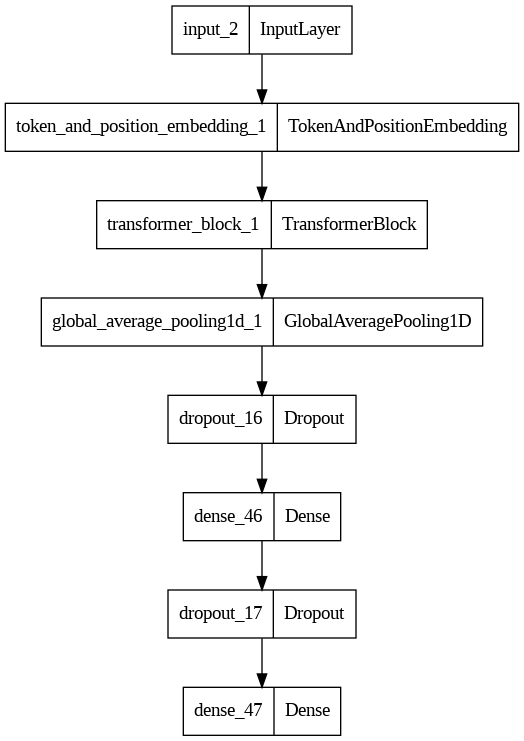

In [ ]:
plot_model(model)

In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test), verbose=False)

print("테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 19s 25ms/step - loss: 0.3154 - accuracy: 0.8730
테스트 정확도: 0.8730
